Importing libraries

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from scipy.stats import norm
from sklearn.feature_selection import SelectKBest, chi2

Importing dataset

In [21]:
classification = pd.read_csv('en_lpor_classification.csv')
explorer = pd.read_csv('en_lpor_explorer.csv')

Exploratory data analysis

In [22]:
classification.head()
explorer.head()

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Is_Dating,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
0,Gabriel Pereira,Female,18,Urban,Above 3,Separated,Higher Education,Higher Education,Homemaker,Teacher,...,No,Good,Moderate,High,Very Low,Very Low,Fair,4,0,11
1,Gabriel Pereira,Female,17,Urban,Above 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Excellent,Moderate,Moderate,Very Low,Very Low,Fair,2,9,11
2,Gabriel Pereira,Female,15,Urban,Up to 3,Living Together,Primary School,Primary School,Homemaker,other,...,No,Good,Moderate,Low,Low,Moderate,Fair,6,12,13
3,Gabriel Pereira,Female,15,Urban,Above 3,Living Together,Higher Education,Lower Secondary School,Health,Services,...,Yes,Fair,Low,Low,Very Low,Very Low,Very Good,0,14,14
4,Gabriel Pereira,Female,16,Urban,Above 3,Living Together,High School,High School,other,other,...,No,Good,Moderate,Low,Very Low,Low,Very Good,0,11,13


In [23]:
classification.describe()
explorer.describe()

,Age,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
count,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.659476,11.399076,11.570108
std,1.218138,4.640759,2.745265,2.913639
min,15.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,10.000000,10.000000
50%,17.000000,2.000000,11.000000,11.000000
75%,18.000000,6.000000,13.000000,13.000000
max,22.000000,32.000000,19.000000,19.000000


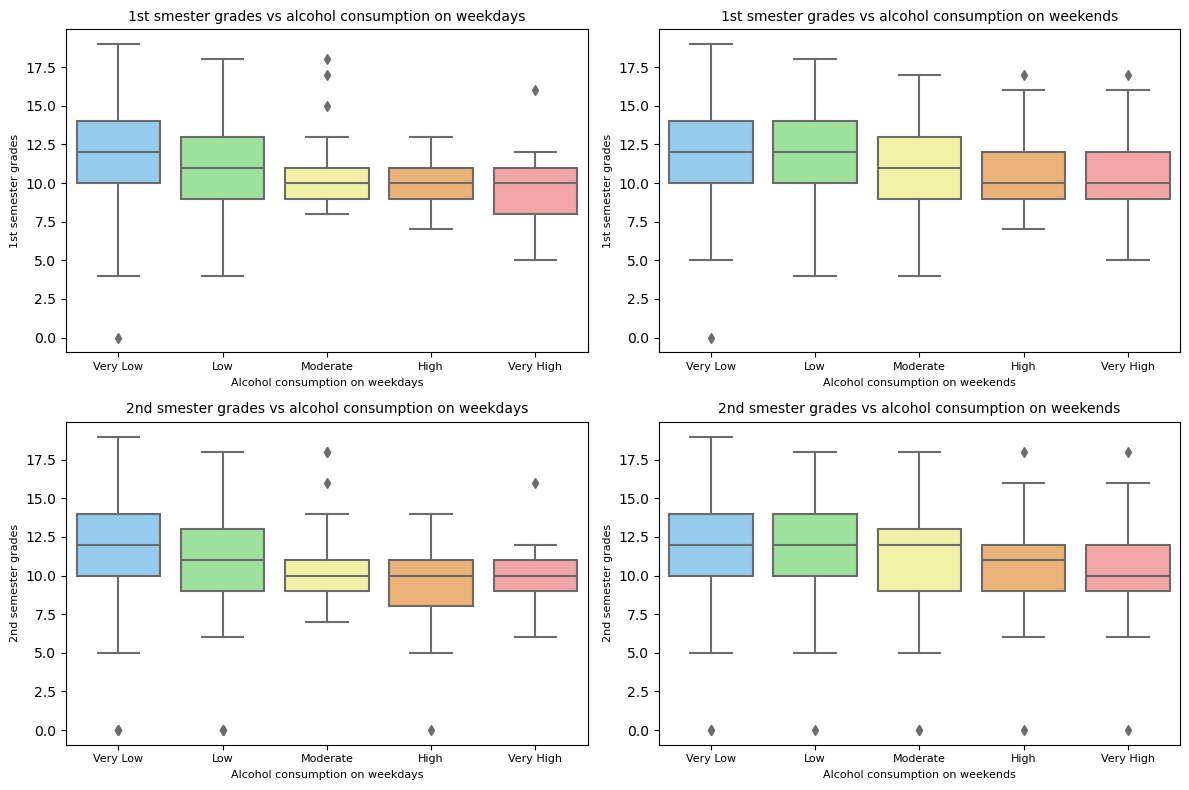

╒═══════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Alcohol consumption   │   1st sem, weekdays │   1st sem, weekends │   2nd sem, weekdays │   2nd sem, weekends │
╞═══════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ Very Low              │                  12 │                  12 │                  12 │                  12 │
├───────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Low                   │                  11 │                  12 │                  11 │                  12 │
├───────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Moderate              │                  10 │                  11 │                  10 │                  12 │
├───────────────────────┼─────────────────────┼─────────────────────┼───────────────────

In [24]:
plt.figure(figsize=(12, 8))
colors=['#87CEFA', '#90EE90', '#FFFF99', '#FFB366', '#FF9999']
plt.subplot(2, 2, 1)
sns.boxplot(x='Alcohol_Weekdays',y='Grade_1st_Semester',data=explorer, order = ["Very Low", "Low", "Moderate", "High", "Very High"], palette=colors)
plt.title("1st smester grades vs alcohol consumption on weekdays", fontsize=10)
plt.xlabel("Alcohol consumption on weekdays", fontsize=8)
plt.ylabel("1st semester grades", fontsize=8)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Low", "Low", "Moderate", "High", "Very High"], fontsize=8)
median_value_very_low_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Very Low']['Grade_1st_Semester'])
median_value_low_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Low']['Grade_1st_Semester'])
median_value_moderate_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Moderate']['Grade_1st_Semester'])
median_value_high_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'High']['Grade_1st_Semester'])
median_value_very_high_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Very High']['Grade_1st_Semester'])

plt.subplot(2, 2, 2)
sns.boxplot(x='Alcohol_Weekends',y='Grade_1st_Semester',data=explorer, order = ["Very Low", "Low", "Moderate", "High", "Very High"], palette=colors)
plt.title("1st smester grades vs alcohol consumption on weekends", fontsize=10)
plt.xlabel("Alcohol consumption on weekends", fontsize=8)
plt.ylabel("1st semester grades", fontsize=8)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Low", "Low", "Moderate", "High", "Very High"], fontsize=8)
median_value_very_low_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Very Low']['Grade_1st_Semester'])
median_value_low_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Low']['Grade_1st_Semester'])
median_value_moderate_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Moderate']['Grade_1st_Semester'])
median_value_high_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'High']['Grade_1st_Semester'])
median_value_very_high_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Very High']['Grade_1st_Semester'])

plt.subplot(2, 2, 3)
sns.boxplot(x='Alcohol_Weekdays',y='Grade_2nd_Semester',data=explorer, order = ["Very Low", "Low", "Moderate", "High", "Very High"], palette=colors)
plt.title("2nd smester grades vs alcohol consumption on weekdays", fontsize=10)
plt.xlabel("Alcohol consumption on weekdays", fontsize=8)
plt.ylabel("2nd semester grades", fontsize=8)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Low", "Low", "Moderate", "High", "Very High"], fontsize=8)
median_value_very_low_3 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Very Low']['Grade_2nd_Semester'])
median_value_low_3 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Low']['Grade_2nd_Semester'])
median_value_moderate_3 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Moderate']['Grade_2nd_Semester'])
median_value_high_3 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'High']['Grade_2nd_Semester'])
median_value_very_high_3 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Very High']['Grade_2nd_Semester'])

plt.subplot(2, 2, 4)
sns.boxplot(x='Alcohol_Weekends',y='Grade_2nd_Semester',data=explorer, order = ["Very Low", "Low", "Moderate", "High", "Very High"], palette=colors)
plt.title("2nd smester grades vs alcohol consumption on weekends", fontsize=10)
plt.xlabel("Alcohol consumption on weekends", fontsize=8)
plt.ylabel("2nd semester grades", fontsize=8)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Low", "Low", "Moderate", "High", "Very High"], fontsize=8)
median_value_very_low_4 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Very Low']['Grade_2nd_Semester'])
median_value_low_4 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Low']['Grade_2nd_Semester'])
median_value_moderate_4 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Moderate']['Grade_2nd_Semester'])
median_value_high_4 = np.median(explorer[explorer['Alcohol_Weekends'] == 'High']['Grade_2nd_Semester'])
median_value_very_high_4 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Very High']['Grade_2nd_Semester'])


plt.tight_layout()
plt.show()

table_grades = [
    ["Very Low", median_value_very_low_1, median_value_very_low_2, median_value_very_low_3, median_value_very_low_4],
    ["Low", median_value_low_1, median_value_low_2, median_value_low_3, median_value_low_4],
    ["Moderate", median_value_moderate_1, median_value_moderate_2, median_value_moderate_3, median_value_moderate_4],
    ["High", median_value_high_1, median_value_high_2, median_value_high_3, median_value_high_4],
    ["Very High", median_value_very_high_1, median_value_very_high_2, median_value_very_high_3, median_value_very_high_4]
]

# Afficher le tableau avec des bordures
table = tabulate(table_grades, headers=["Alcohol consumption", "1st sem, weekdays", "1st sem, weekends", "2nd sem, weekdays", "2nd sem, weekends"], tablefmt="fancy_grid")
print(table)

The students alcohol consumption seems to have a biggest impact if they drink during the week. Indeed, on both semesters, the median of those who have a low alochol consumption are 1 point lower that for those whose consumption is very low. Plus, there is a difference of two points between the medians of those who have a moderate consumption during the 2nd semester : the one of the stundents who drink during the week is lower that the one of those who drink during weekends.

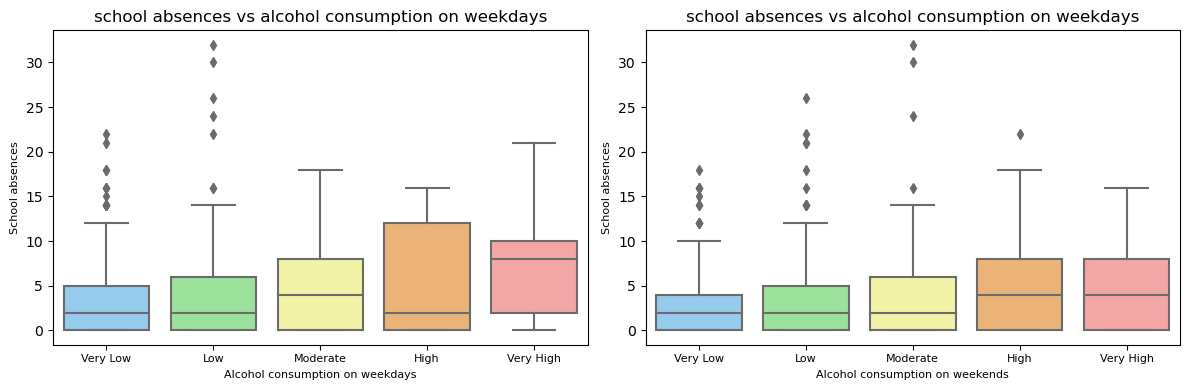

╒═══════════════════════╤════════════╤═════════════╕
│ Alcohol consumption   │   weekdays │    weekends │
╞═══════════════════════╪════════════╪═════════════╡
│ Very Low              │          2 │           2 │
├───────────────────────┼────────────┼─────────────┤
│ Low                   │          2 │           2 │
├───────────────────────┼────────────┼─────────────┤
│ Moderate              │          4 │           2 │
├───────────────────────┼────────────┼─────────────┤
│ High                  │          2 │           4 │
├───────────────────────┼────────────┼─────────────┤
│ Very High             │          8 │           4 │
╘═══════════════════════╧════════════╧═════════════╛


In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
sns.boxplot(x='Alcohol_Weekdays',y='School_Absence',data=explorer, order = ["Very Low", "Low", "Moderate", "High", "Very High"], palette=colors)
plt.title("school absences vs alcohol consumption on weekdays")
plt.xlabel("Alcohol consumption on weekdays", fontsize=8)
plt.ylabel("School absences", fontsize=8)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Low", "Low", "Moderate", "High", "Very High"], fontsize=8)
median_value_very_low_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Very Low']['School_Absence'])
median_value_low_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Low']['School_Absence'])
median_value_moderate_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Moderate']['School_Absence'])
median_value_high_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'High']['School_Absence'])
median_value_very_high_1 = np.median(explorer[explorer['Alcohol_Weekdays'] == 'Very High']['School_Absence'])

plt.subplot(1, 2, 2 )
sns.boxplot(x='Alcohol_Weekends',y='School_Absence',data=explorer, order = ["Very Low", "Low", "Moderate", "High", "Very High"], palette=colors)
plt.title("school absences vs alcohol consumption on weekdays")
plt.xlabel("Alcohol consumption on weekends", fontsize=8)
plt.ylabel("School absences", fontsize=8)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Very Low", "Low", "Moderate", "High", "Very High"], fontsize=8)
median_value_very_low_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Very Low']['School_Absence'])
median_value_low_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Low']['School_Absence'])
median_value_moderate_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Moderate']['School_Absence'])
median_value_high_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'High']['School_Absence'])
median_value_very_high_2 = np.median(explorer[explorer['Alcohol_Weekends'] == 'Very High']['School_Absence'])

plt.tight_layout()
plt.show()

table_absences = [
    ["Very Low", median_value_very_low_1, median_value_very_low_2],
    ["Low", median_value_low_1, median_value_low_2],
    ["Moderate", median_value_moderate_1, median_value_moderate_2],
    ["High", median_value_high_1, median_value_high_2],
    ["Very High", median_value_very_high_1, median_value_very_high_2]
]

# Afficher le tableau avec des bordures
table = tabulate(table_absences, headers=["Alcohol consumption", "weekdays", " weekends"], tablefmt="fancy_grid")
print(table)

weekdays 2 times higher than weekends for very high consumption

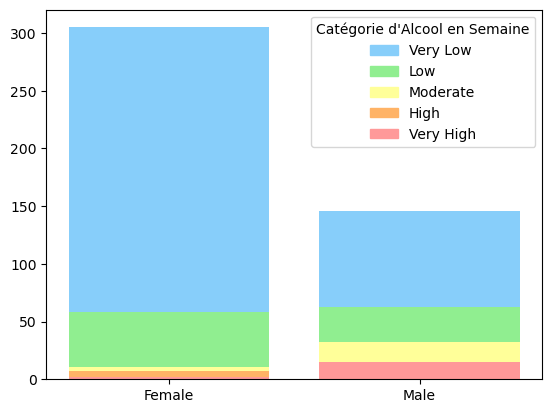

In [26]:
very_low = explorer[explorer["Alcohol_Weekdays"] == "Very Low"]
very_low_count_gender = very_low["Gender"].value_counts()
bar1 = plt.bar(very_low_count_gender.index, very_low_count_gender, color = colors[0])

low = explorer[explorer["Alcohol_Weekdays"] == "Low"]
low_count_gender = low["Gender"].value_counts()
bar2 = plt.bar(low_count_gender.index, low_count_gender, color = colors[1])

moderate = explorer[explorer["Alcohol_Weekdays"] == "Moderate"]
moderate_count_gender = moderate["Gender"].value_counts()
bar3 = plt.bar(moderate_count_gender.index, moderate_count_gender, color = colors[2])

high = explorer[explorer["Alcohol_Weekdays"] == "High"]
high_count_gender = high["Gender"].value_counts()
bar4 = plt.bar(high_count_gender.index, high_count_gender, color = colors[3])

very_high = explorer[explorer["Alcohol_Weekdays"] == "Very High"]
very_high_count_gender = very_high["Gender"].value_counts()
bar5 = plt.bar(very_high_count_gender.index, very_high_count_gender, color = colors[4])

legend_labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
legend_colors = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_colors, legend_labels, title="Catégorie d'Alcool en Semaine", loc='upper right')


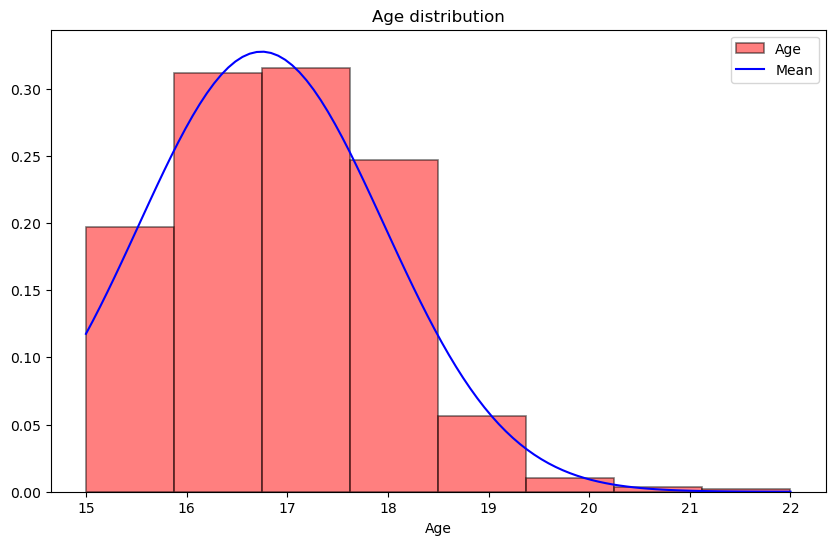

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(explorer['Age'], bins=explorer['Age'].nunique(), color='red', alpha=0.5, edgecolor='black', linewidth=1.2, density=True, label='Age')
plt.title('Age distribution')
plt.plot(np.linspace(min(explorer['Age']), max(explorer['Age']), 100), norm.pdf(np.linspace(min(explorer['Age']), max(explorer['Age']), 100), explorer['Age'].mean(), explorer['Age'].std()), color='blue', label='Mean')
plt.xlabel('Age')
plt.legend()
plt.show()

,Age,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
Age,1.000000,0.149998,-0.174322,-0.107119
School_Absence,0.149998,1.000000,-0.147149,-0.124745
Grade_1st_Semester,-0.174322,-0.147149,1.000000,0.864982
Grade_2nd_Semester,-0.107119,-0.124745,0.864982,1.000000


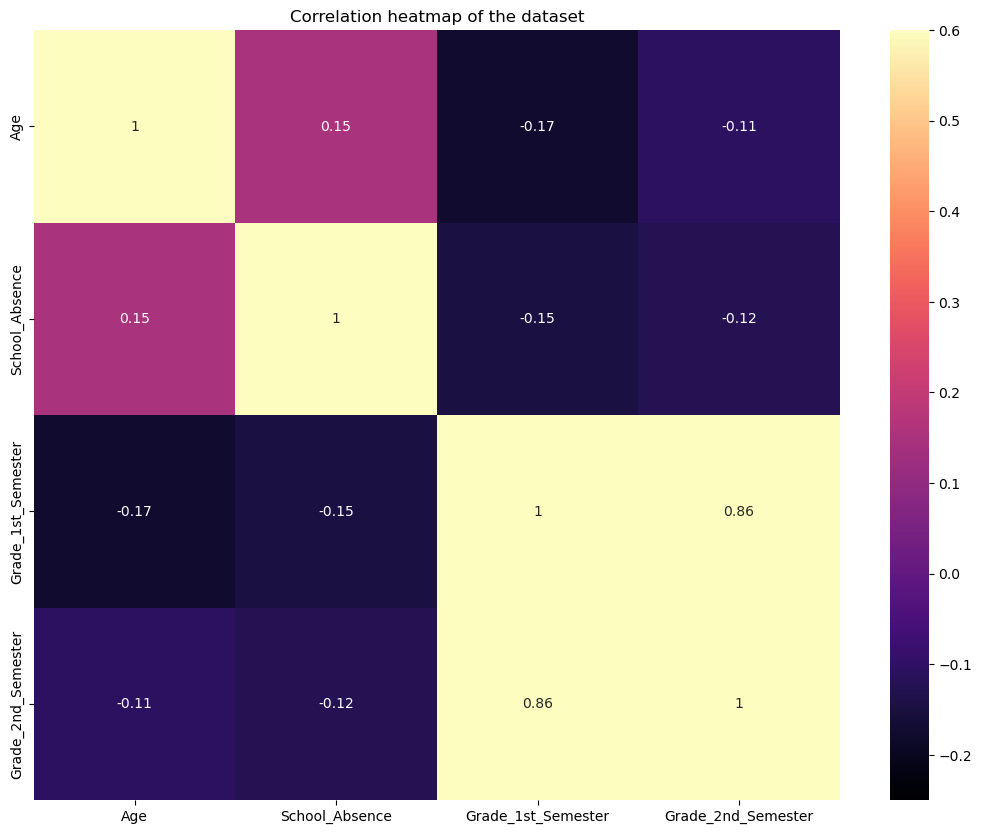

In [28]:
display(explorer.corr())
plt.figure(figsize=(13,10))
sns.heatmap(explorer.corr(), cmap = 'magma', vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation heatmap of the dataset')
plt.show()

Preprocessing

In [30]:
# Créer un dictionnaire de mapping pour les catégories
mapping = {'very low': 0, 'low': 0, 'moderate': 1, 'high': 1, 'very high': 1}

# Appliquer le mapping à la colonne 'Alcohol_Weekends'
explorer['Alcohol_Weekends_Binary'] = explorer['Alcohol_Weekends'].map(mapping)


In [34]:
for col in explorer.columns:
    if explorer[col].dtype == 'object':
        dic = {}
        i = 0
        for k in explorer[col].unique():
            dic[k] = i
            i += 1
        explorer[col] = explorer[col].map(dic)

display(explorer.head(10))

print(f'Frequencies of alcoholism on weekends:\n{explorer["Alcohol_Weekends"].value_counts() / len(explorer["Alcohol_Weekends"])}')

,School,Gender,Age,Housing_Type,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Work,Father_Work,...,Good_Family_Relationship,Free_Time_After_School,Time_with_Friends,Alcohol_Weekdays,Alcohol_Weekends,Health_Status,School_Absence,Grade_1st_Semester,Grade_2nd_Semester,Alcohol_Weekends_Binary
0,0,0,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,11,NaN
1,0,0,17,0,0,1,1,1,0,1,...,1,0,1,0,0,0,2,9,11,NaN
2,0,0,15,0,1,1,1,1,0,1,...,0,0,2,1,1,0,6,12,13,NaN
3,0,0,15,0,0,1,0,2,1,2,...,2,1,2,0,0,1,0,14,14,NaN
4,0,0,16,0,0,1,2,3,2,1,...,0,0,2,0,2,1,0,11,13,NaN
5,0,1,16,0,1,1,0,3,3,1,...,1,2,2,0,2,1,6,12,12,NaN
6,0,1,16,0,1,1,3,2,2,1,...,0,2,0,0,0,0,0,13,12,NaN
7,0,0,17,0,0,0,0,0,2,0,...,0,3,0,0,0,2,2,10,13,NaN
8,0,1,15,0,1,0,2,2,3,1,...,0,1,2,0,0,2,0,15,16,NaN
9,0,1,15,0,0,1,2,0,2,1,...,1,4,3,0,0,1,0,12,12,NaN


Frequencies of alcoholism on weekends:
0    0.380586
2    0.231125
1    0.184900
3    0.134052
4    0.069337
Name: Alcohol_Weekends, dtype: float64


In [35]:
print(f'Frequencies of alcoholism on week days:\n{explorer["Alcohol_Weekdays"].value_counts() / len(explorer["Alcohol_Weekdays"])}')

Frequencies of alcoholism on week days:
0    0.694915
1    0.186441
3    0.066256
2    0.026194
4    0.026194
Name: Alcohol_Weekdays, dtype: float64


Feature selection

In [37]:
X_new = SelectKBest(chi2, k=5).set_output(transform = "pandas").fit_transform(explorer.drop(['Oldpeak','Alcohol_Weekends'], axis=1), df['HeartDisease'])

print(f'Original shape: {explorer.drop(["Oldpeak", "Alcohol_Weekends"], axis=1).shape}')
print(f'New shape: {X_new.shape}')

display(X_new.head(10)é)
display(X_new.info())
display(X_new.describe())

AttributeError: 'SelectKBest' object has no attribute 'set_output'